In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# **False Position and Secant method**<br>
The False Position method is one of the methods of finding roots of a non-linear function. Similar to the Bisection method, it falls under the category of **Bracketing methods** since the initial boundary guesses, $x_l$ and $x_u$, must bracket the actual root. And the assumption here is that the function is real continuous, otherwise the False position method wouldn't work. The main difference between the Bisection method and False position method is that it takes advantage of the fact that one of the boundary values, either $x_l$ or $x_u$, would have their functional value be closer to the zero of the function, and this would result in the new estimation $x_r$ be closer to one of the bracketing values than the mid-point $x_m$.

In today's lab, we will be implementing the False position method in python. Just like in the previous lab for Bisection method, we will be considering the function $f(x)$ as an array of coefficients, for instance if we want to have $f(x) = 0.5x^3-2x+5$, then in python we will create an array as follows:


In [ ]:
f = [0.5,0,-2,5]
epsilon = 0.01

Note that your implementation should be able to handle the array `f` of any size, which means it should be able to find the root of any given polynomial. But for testing purposes, you can use the array `f` given here.

Next, you will need to create a user-defined function as follows
```
func(f, x)
```
This function will take the coefficent array `f` and a point `x` as input and evaluate the value of the function at that point `x` using a loop and return that value. This function will be called in the other function that you will implement, which is as follows:
```
falseposition(f, xl, xu, epsilon)
```
This function will return the root of the equation represented by the array `f` and in case it does not reach the root exactly then it will return the close enough value to the root that has an absolute Relative Approximate Error $\epsilon_a$ of at most `epsilon` (%). Here, `epsilon` is the Relative Tolerance $\epsilon_s$.

## False Position Method
### Task 1: The Function

In [ ]:
# Write a function to return the value of the polynomial at the point x
def func(f, x):
    # Write your code here
    length = len(f)
    val = 0
    j = length - 1
    for i in f:
      val += i * (x**j)
      j-=1
    return val

In [ ]:
print(func(f,2))
print(func(f,3))
print(func(f,5))

5.0
12.5
57.5


Sample Test Cases:
<br>
**Input**   $\quad$    **Output**
<br>
2$\quad\quad\quad$5
<br>
3$\quad\quad\quad$12.5
<br>
5$\quad\quad\quad$57.5

### Task 2: The Algorithm
Now, its time to implement the whole algorithm. Take the initial guesses as $x_l = -4$ and $x_u = 4$, the Relative Error Tolerance $\epsilon_s$ as $0.01\%$, and the maximum number of iterations as $10000$.
Implement the function for False position method following the requirements set earlier. For the function given above, there is only one real root and it is $-2.761$.

In [ ]:
MAX_ITERS=10000
xl = -4
xu = 4

def falseposition(f, xl, xu, epsilon):
    # Write your code here
    errors = np.array([])
    count = 0
    xr_old = 0
    xr_values = np.array([])
    sig_values = np.array([])
    while True:
      count+=1
      xr = (((xu)*func(f,xl))-((xl)*func(f,xu)))/ (func(f,xl)-func(f,xu))
      if abs(((xr-xr_old)/xr)*100) < epsilon :
        break

      if func(f,xl)*func(f,xr) < 0:
        xu = xr
      else:
        xl = xr

      errors = np.append(errors, abs(((xr-xr_old)/xr)*100))
      sig_values = np.append(sig_values, math.floor(2-math.log10((xr-xr_old)/(0.5*xr))))
      xr_values = np.append(xr_values, xr)
      xr_old=xr


    return xr, errors, count, sig_values, xr_values

In [ ]:
# Use this driver code for calling the function and testing it
root, errors, count, sig_values, xr_values = falseposition(f, xl, xu, epsilon)
print(root, errors, count, sig_values, xr_values)

-2.7606923631052793 [1.00000000e+02 4.88475177e+01 2.61187947e+01 1.25116034e+01
 5.37544938e+00 2.16967452e+00 8.51128916e-01 3.29982426e-01
 1.27340775e-01 4.90522695e-02 1.88819750e-02] 12 [1. 2. 2. 2. 2. 3. 3. 4. 4. 5. 5.] [-0.83333333 -1.62911612 -2.20504811 -2.52038921 -2.66356795 -2.72264039
 -2.74601249 -2.75510385 -2.7586167  -2.75997053 -2.76049176]


The value should be very very close to $-2.761$. (*e.g.* $-2.7606923631052793$)<br>
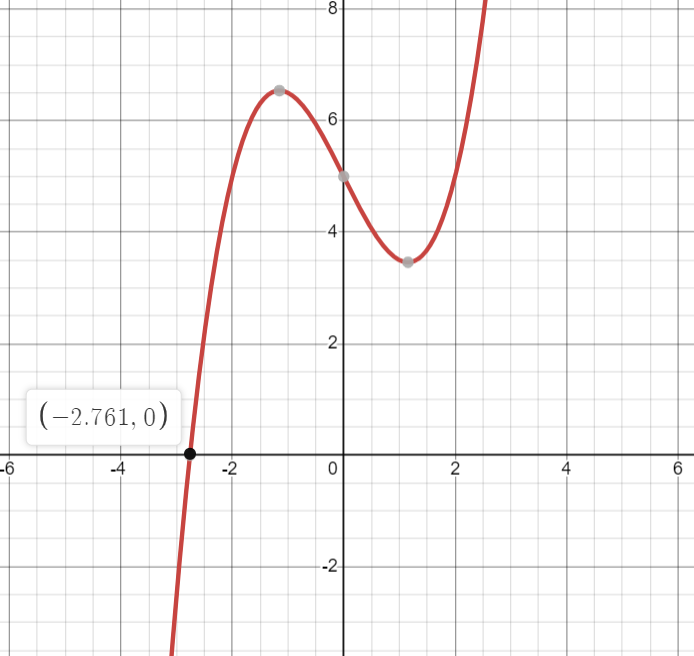

### Task 3: Plotting
In case you do not remember how graphs can be plotted in Python, here is a sample code showing how to do it using the `matplotlib` library.


In [ ]:
iters = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
vals = np.arange(100, 200, 20) #start=100, stop=200, step=20

plt.plot(iters, vals)
plt.title("Iterations vs values plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Root Approximation $(x_r)$ along the $Y$-axis.

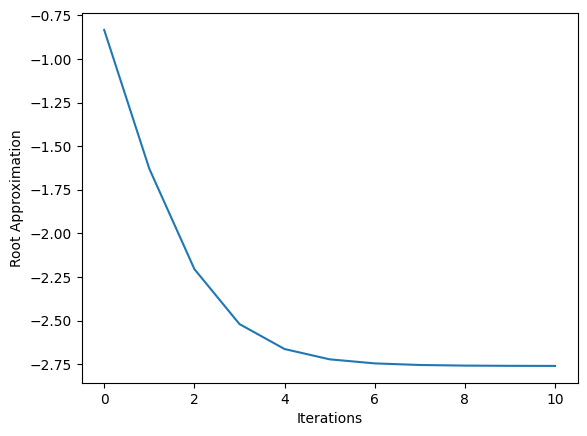

In [ ]:
plt.plot(np.arange(len(xr_values)), xr_values)
plt.xlabel("Iterations")
plt.ylabel("Root Approximation")
plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Relative Approximate Error $(\epsilon_a)$ along the $Y$-axis.

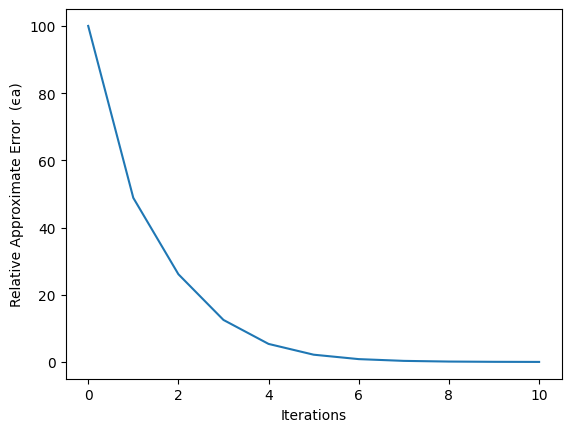

In [ ]:
plt.plot(np.arange(len(errors)), errors)
plt.xlabel("Iterations")
plt.ylabel("Relative Approximate Error  (ϵa)")
plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Number of Significant Digits that are at least correct $(m)$ along the $Y$-axis.

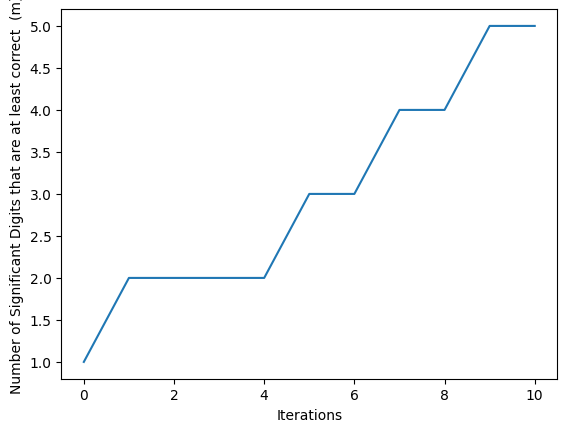

In [ ]:
plt.plot(np.arange(len(sig_values)), sig_values)
plt.xlabel("Iterations")
plt.ylabel("Number of Significant Digits that are at least correct  (m)")
plt.show()

## Secant Method
The Secant method is another method of finding roots of a nonlinear function. Unlike the Bisection and False position method, it falls under the category of **Open methods** due to the fact that we only need two initial guesses that do not have to bracket the actual root. Secant method works by approximating the derivative that is used in **Newton Raphson method**.

### Task 4: The Algorithm
Implement the Secant method for the above function $f(x)$ and test its implementation. As aforementioned, the actual root is $-2.761$, and you can take the initial guesses for the secant as $x_0 = 2$ and $x_1 = 3$. Take the Relative Error Tolerance $\epsilon_s$ as $0.01\%$, and the maximum number of iterations as $10000$.

In [ ]:
MAX_ITERS=10000
x_neg1 = 2
x0 = 3

def secant(f, x, x_prev, epsilon):
    # Write your code here
    errors_sec = np.array([])
    root_approx = np.array([])
    signi_values = np.array([])
    while True:
        x_next = x - ((func(f,x)*(x-x_prev))/(func(f,x)-func(f,x_prev)))
        if abs(((x_next - x)/x_next)*100) < epsilon:
            break

        errors_sec = np.append(errors_sec,abs(((x_next - x)/x_next)*100))
        root_approx = np.append(root_approx, x_next)
        signi_values = np.append(signi_values, np.floor(2-math.log10(abs((x_next-x)/(0.5*x_next)))))

        x_prev = x
        x = x_next

    return x_next, errors_sec, root_approx, signi_values

In [ ]:
# Use this driver code for calling the function and testing it
root, errors_sec, root_approx, signi_values = secant(f, x0, x_neg1, epsilon)
print(root, errors_sec, root_approx, signi_values)

-2.7608178652970703 [1.25000000e+02 9.59595960e+01 9.29067060e+01 1.49743230e+03
 1.60427190e+01 8.35907089e+01 7.16948966e+02 8.35320974e+01
 4.75854717e+01 2.07094530e+01 5.33593596e+00 1.56243207e+00
 7.10958158e-02] [ 1.33333333  0.68041237  9.59233285  0.60048447  0.51746846  3.15350891
 -0.51114583 -3.10389151 -2.10311453 -2.65241522 -2.80192409 -2.75881941
 -2.76078221] [1. 1. 1. 0. 2. 1. 0. 1. 2. 2. 2. 3. 4.]


The value should be very very close to $-2.761$. (*e.g.* $-2.7608178652970703$)<br>
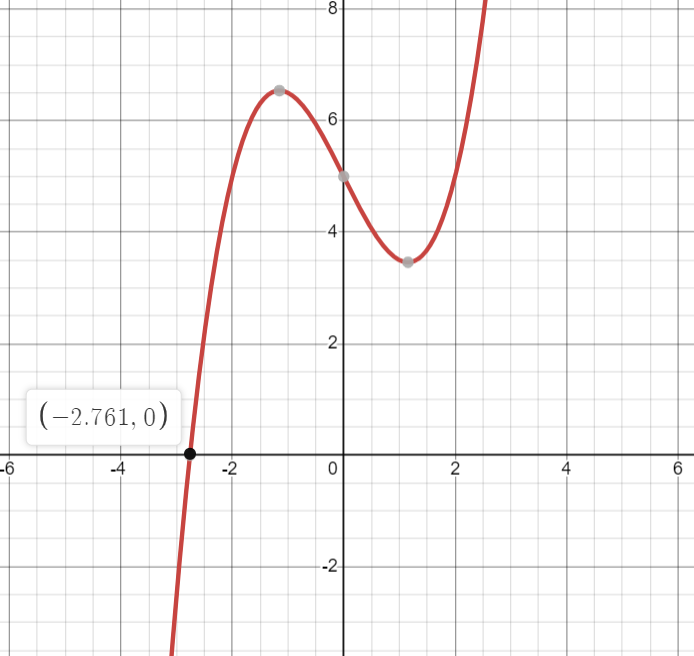

### Task 5: Plotting

Plot a graph with Number of Iterations along the $X$-axis and Root Approximation $(x_i)$ along the $Y$-axis.

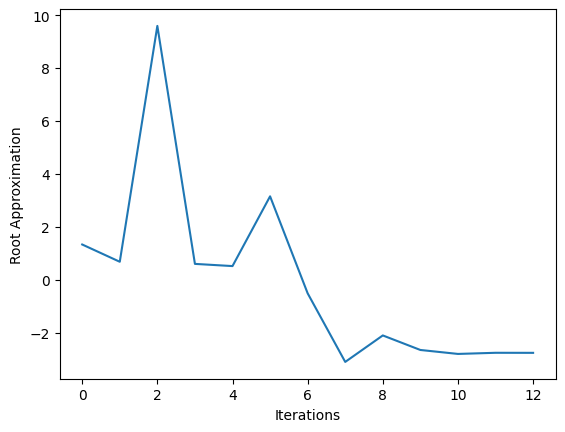

In [ ]:
plt.plot(np.arange(len(root_approx)), root_approx)
plt.xlabel("Iterations")
plt.ylabel("Root Approximation")
plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Relative Approximate Error $(\epsilon_a)$ along the $Y$-axis.

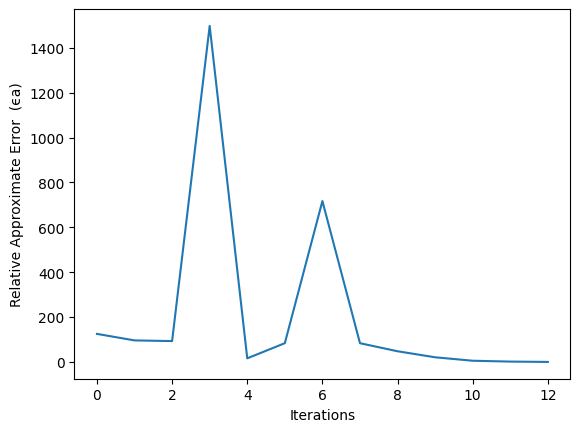

In [ ]:
plt.plot(np.arange(len(errors_sec)), errors_sec)
plt.xlabel("Iterations")
plt.ylabel("Relative Approximate Error  (ϵa)")
plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Number of Significant Digits that are at least correct $(m)$ along the $Y$-axis.

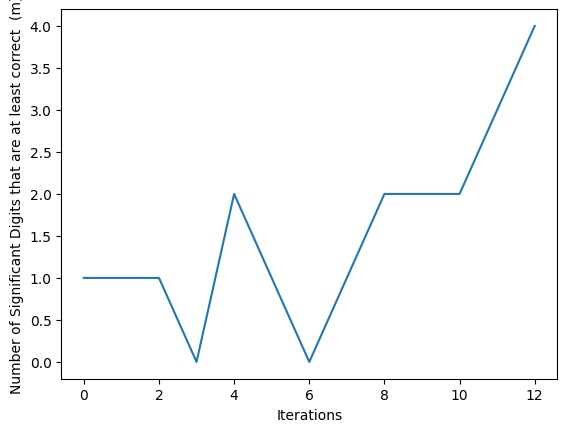

In [ ]:
plt.plot(np.arange(len(signi_values)), signi_values)
plt.xlabel("Iterations")
plt.ylabel("Number of Significant Digits that are at least correct  (m)")
plt.show()